In [1]:
# import libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import random

# read in data
p = .1
accre = pd.read_csv('data/accre_data.txt', sep='|', low_memory=False,skiprows=lambda i: i>0 and random.random() > p)
accre.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15811618,15811618,accre,production,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01T05:00:01,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1063,skim_test
1,15811621,15811621,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:22,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_33ee450ebdc4
2,15811650,15811650,accre,production,h_vuiis,h_vuiis,36052,vuiiscci,NaN,2017-07-01T05:01:26,...,COMPLETED,1,1,1,10Gn,NaN,"cpu=1,mem=10G,node=1",5-08:00:00,vmp1130,NDW_ROCKLAND-x-A00037476-x-A00037476_V2-x-MGC_...
3,15811654,15811654,accre,production,cms_samtest,cms,31000,uscms010,NaN,2017-07-01T05:01:56,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_0f07d813600e
4,15811657_3,15811661,accre,production,p_iglab_csb,p_iglab,20440,nagarr1,497968.0,2017-07-01T05:02:05,...,COMPLETED,1,1,1,15Gn,NaN,"cpu=1,mem=15G,node=1",1-00:00:00,vmp203,fp_single.slurm


In [2]:
# look at the shape of the dataset
accre.shape

(1250061, 25)

In [3]:
# identify the column names of the dataset
accre.columns

Index(['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'],
      dtype='object')

In [4]:
# check data types
accre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250061 entries, 0 to 1250060
Data columns (total 25 columns):
JobID        1250061 non-null object
JobIDRaw     1250061 non-null int64
Cluster      1250061 non-null object
Partition    1239310 non-null object
Account      1250061 non-null object
Group        1250061 non-null object
GID          1250061 non-null int64
User         1250061 non-null object
UID          766482 non-null float64
Submit       1250061 non-null object
Eligible     1250061 non-null object
Start        1250061 non-null object
End          1250061 non-null object
Elapsed      1250061 non-null object
ExitCode     1250061 non-null object
State        1250061 non-null object
NNodes       1250061 non-null int64
NCPUS        1250061 non-null int64
ReqCPUS      1250061 non-null int64
ReqMem       1250061 non-null object
ReqGRES      8292 non-null object
ReqTRES      1239310 non-null object
Timelimit    1239310 non-null object
NodeList     1250061 non-null object
JobName

### In order analyze how long a job waits in the queue, we need to create a 'Queue Time' column. First, need to convert Submit and Start columns to datetime objects.

In [5]:
# convert Submit and Start to datetime
accre['Submit'] = pd.to_datetime(accre['Submit'], format='%Y/%m/%d')
accre['Start'] = pd.to_datetime(accre['Start'], format='%Y/%m/%d')

In [6]:
# check head of Submit
accre.Submit.head()

0   2017-07-01 05:00:01
1   2017-07-01 05:00:22
2   2017-07-01 05:01:26
3   2017-07-01 05:01:56
4   2017-07-01 05:02:05
Name: Submit, dtype: datetime64[ns]

In [7]:
# check head of Start
accre.Start.head()

0   2017-07-01 05:00:04
1   2017-07-01 05:00:23
2   2017-07-01 13:51:49
3   2017-07-01 05:01:56
4   2017-07-01 05:02:11
Name: Start, dtype: datetime64[ns]

##### Now we can subtract Submit from Start to get the Queue Time.

In [8]:
# create Queue_Time column = Start - Submit
accre['Queue_Time'] = accre['Start'] - accre['Submit']
accre.Queue_Time.head()

0   00:00:03
1   00:00:01
2   08:50:23
3   00:00:00
4   00:00:06
Name: Queue_Time, dtype: timedelta64[ns]

In [9]:
# remove unnecessary rows to decrease number of columns
cols = ['JobIDRaw','Partition','Cluster','JobName']
accre_reduced_cols = accre.drop(columns=cols)
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time
0,15811618,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01 05:00:01,2017-07-01T05:00:01,2017-07-01 05:00:04,2017-07-01T05:03:22,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1063,00:00:03
1,15811621,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:22,2017-07-01T05:00:22,2017-07-01 05:00:23,2017-07-01T05:00:33,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,00:00:01
2,15811650,h_vuiis,h_vuiis,36052,vuiiscci,NaN,2017-07-01 05:01:26,2017-07-01T05:01:26,2017-07-01 13:51:49,2017-07-05T22:33:58,...,COMPLETED,1,1,1,10Gn,NaN,"cpu=1,mem=10G,node=1",5-08:00:00,vmp1130,08:50:23
3,15811654,cms_samtest,cms,31000,uscms010,NaN,2017-07-01 05:01:56,2017-07-01T05:01:56,2017-07-01 05:01:56,2017-07-01T05:03:56,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,00:00:00
4,15811657_3,p_iglab_csb,p_iglab,20440,nagarr1,497968.0,2017-07-01 05:02:05,2017-07-01T05:02:05,2017-07-01 05:02:11,2017-07-01T05:02:28,...,COMPLETED,1,1,1,15Gn,NaN,"cpu=1,mem=15G,node=1",1-00:00:00,vmp203,00:00:06


In [10]:
# get top 20 groups by JobID
accre_reduced_cols[['GID', 'Group', 'JobID']].groupby(['GID','Group']).agg('count').sort_values(by ='JobID', ascending=False).head(20)

,,JobID
GID,Group,
31000,cms,507227
59350,beam_lab,149600
59420,p_csb_meiler,73799
36068,mip_eecs,57971
59298,cms_stage1,46000
10023,p_meiler,45586
59402,lola,44966
59331,h_biostat_student,44531
59422,math,37219


In [11]:
# get bottom 20 groups by jobID
accre_reduced_cols[['GID', 'Group', 'JobID']].groupby(['GID','Group']).agg('count').sort_values(by ='JobID', ascending=True).head(20)

,,JobID
GID,Group,
59335,p_blocher,1
20495,biomath,1
59307,h_lasko_lab,2
59397,aldrich_lab,2
59445,cs3891,3
59442,physics,4
36036,h_dosimetry,4
59443,bsci3272,4
20813,smith_lab,4


In [12]:
# get top 20 groups by user
accre_reduced_cols[['UID', 'User', 'JobID']].groupby(['UID','User']).agg('count').sort_values(by ='JobID', ascending=False).head(20)

,,JobID
UID,User,
207302.0,deik,66408
574202.0,sotocs,64809
9209.0,autocms,47670
9202.0,cmslocal,47197
233240.0,cakira,41685
501421.0,ozgunka,37375
342713.0,zhangdk,37219
173433.0,shockle,30846
171357.0,janjamrk,30172


In [13]:
# get bottom 20 groups by user
accre_reduced_cols[['UID','User','JobID']].groupby(['UID','User']).agg('count').sort_values(by='JobID', ascending=True).head(20)

,,JobID
UID,User,
712927.0,rajagosv,1
566631.0,greerc2,1
697860.0,jiag,1
345883.0,chennd,1
741065.0,remedis,1
111765.0,tany2,1
667840.0,malavejm,1
128553.0,polynsm,1
169950.0,nih,1


In [14]:
# get the most frequent values for ReqMem -- need to import Counter from collections
from collections import Counter

mem_types = Counter(accre_reduced_cols.ReqMem)
mem_types.most_common(10)

[('5000Mn', 234125),
 ('28000Mn', 203725),
 ('2Gc', 89495),
 ('1024Mn', 80768),
 ('10Gn', 74652),
 ('8000Mn', 61900),
 ('16000Mn', 61250),
 ('2000Mn', 37665),
 ('4Gn', 37655),
 ('20Gn', 35806)]

In [15]:
# get the most frequent values for ReqMem
accre_reduced_cols.ReqMem.value_counts(ascending=False).head(10)

5000Mn     234125
28000Mn    203725
2Gc         89495
1024Mn      80768
10Gn        74652
8000Mn      61900
16000Mn     61250
2000Mn      37665
4Gn         37655
20Gn        35806
Name: ReqMem, dtype: int64

In [16]:
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time
0,15811618,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01 05:00:01,2017-07-01T05:00:01,2017-07-01 05:00:04,2017-07-01T05:03:22,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1063,00:00:03
1,15811621,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:22,2017-07-01T05:00:22,2017-07-01 05:00:23,2017-07-01T05:00:33,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,00:00:01
2,15811650,h_vuiis,h_vuiis,36052,vuiiscci,NaN,2017-07-01 05:01:26,2017-07-01T05:01:26,2017-07-01 13:51:49,2017-07-05T22:33:58,...,COMPLETED,1,1,1,10Gn,NaN,"cpu=1,mem=10G,node=1",5-08:00:00,vmp1130,08:50:23
3,15811654,cms_samtest,cms,31000,uscms010,NaN,2017-07-01 05:01:56,2017-07-01T05:01:56,2017-07-01 05:01:56,2017-07-01T05:03:56,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,00:00:00
4,15811657_3,p_iglab_csb,p_iglab,20440,nagarr1,497968.0,2017-07-01 05:02:05,2017-07-01T05:02:05,2017-07-01 05:02:11,2017-07-01T05:02:28,...,COMPLETED,1,1,1,15Gn,NaN,"cpu=1,mem=15G,node=1",1-00:00:00,vmp203,00:00:06


## Question: How does the amount of time requested affect a job's queue time?

##### Need to convert Timelimit column into a more usable format.

In [17]:
# create requested_days, _hours, _minutes, _seconds to later calculate Timelimit in total seconds
requested_days = pd.to_numeric(accre_reduced_cols['Timelimit'].str[:-9]).fillna(value=0)
requested_hours = pd.to_numeric(accre_reduced_cols['Timelimit'].str[-8:-6])
requested_minutes = pd.to_numeric(accre_reduced_cols['Timelimit'].str[-5:-3])
requested_seconds = pd.to_numeric(accre_reduced_cols['Timelimit'].str[-2:])
requested_days.head(10)

0    0.0
1    2.0
2    5.0
3    2.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Timelimit, dtype: float64

In [18]:
requested_hours.head(10)

0    12.0
1     0.0
2     8.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
Name: Timelimit, dtype: float64

In [19]:
requested_minutes.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Timelimit, dtype: float64

In [20]:
requested_seconds.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Timelimit, dtype: float64

In [21]:
# write a formula to get Timelimit in total seconds using the variables requested_days, _hours, _minutes, _seconds
accre_reduced_cols['ReqTime'] = (requested_days*86400)+(requested_hours*3600)+(requested_minutes*60)+requested_seconds
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time,ReqTime
0,15811618,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01 05:00:01,2017-07-01T05:00:01,2017-07-01 05:00:04,2017-07-01T05:03:22,...,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1063,00:00:03,43200.0
1,15811621,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:22,2017-07-01T05:00:22,2017-07-01 05:00:23,2017-07-01T05:00:33,...,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,00:00:01,172800.0
2,15811650,h_vuiis,h_vuiis,36052,vuiiscci,NaN,2017-07-01 05:01:26,2017-07-01T05:01:26,2017-07-01 13:51:49,2017-07-05T22:33:58,...,1,1,1,10Gn,NaN,"cpu=1,mem=10G,node=1",5-08:00:00,vmp1130,08:50:23,460800.0
3,15811654,cms_samtest,cms,31000,uscms010,NaN,2017-07-01 05:01:56,2017-07-01T05:01:56,2017-07-01 05:01:56,2017-07-01T05:03:56,...,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,00:00:00,172800.0
4,15811657_3,p_iglab_csb,p_iglab,20440,nagarr1,497968.0,2017-07-01 05:02:05,2017-07-01T05:02:05,2017-07-01 05:02:11,2017-07-01T05:02:28,...,1,1,1,15Gn,NaN,"cpu=1,mem=15G,node=1",1-00:00:00,vmp203,00:00:06,86400.0


### Let's create a new dataframe to see top Users sorted by Requested Time to see how that affects Queue Time.

In [22]:
# create new dataframe with User, UID, ReqTime, Queue_Time, grouped by UID and sorted descending by ReqTime
user_queue = accre_reduced_cols[['UID','User','ReqTime','Queue_Time']].sort_values(by='ReqTime', ascending=False)
user_queue.head()

,UID,User,ReqTime,Queue_Time
110336,389801.0,vanzod,2592000.0,16:33:52
459125,232977.0,moonj,1209600.0,09:06:42
515869,232977.0,moonj,1209600.0,04:08:20
484205,232977.0,moonj,1209600.0,03:34:15
515879,232977.0,moonj,1209600.0,04:12:42


In [23]:
user_queue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250061 entries, 110336 to 1026224
Data columns (total 4 columns):
UID           766482 non-null float64
User          1250061 non-null object
ReqTime       1239310 non-null float64
Queue_Time    1250061 non-null timedelta64[ns]
dtypes: float64(2), object(1), timedelta64[ns](1)
memory usage: 47.7+ MB


In [24]:
# convert Queue_Time to seconds
user_queue['Queue_Time'] = user_queue['Queue_Time'].astype('timedelta64[s]')

In [25]:
user_queue.shape

(1250061, 4)

##### Need to gather a random sample of User IDs to plot ReqTime vs. Queue_Time.

In [26]:
# random sample of users (1000000)
indices = np.random.randint(0, len(user_queue), 1000000)
user_queue_subset = user_queue.iloc[indices]
user_queue_subset.head()

,UID,User,ReqTime,Queue_Time
44559,144605.0,fletchs2,10800.0,2438.0
1141233,501421.0,ozgunka,5400.0,13706.0
313962,207302.0,deik,36000.0,33.0
778549,NaN,masispider,172800.0,2541.0
800941,NaN,cmsglidein,172800.0,2090.0


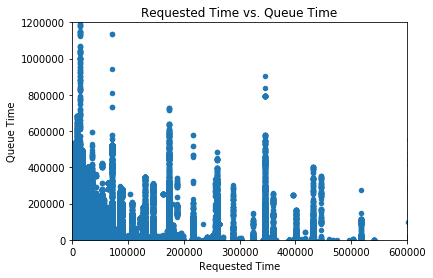

In [27]:
# create a scatter plot to see relationship between requested time and queue time
user_queue_subset.plot(kind='scatter', x='ReqTime', y='Queue_Time')
plt.xlim(0,600000)
plt.ylim(0,1200000)
plt.title('Requested Time vs. Queue Time')
plt.xlabel('Requested Time')
plt.ylabel('Queue Time')
plt.show()

The above scatter plot shows the relationship between Requested Time and Queue Time, both in seconds. This relationship is not what I expected - I was exepecting to see an increase in queue time as a user requests more time per job. However, this plot shows that requesting more time does not result in a greater amount of queue time. This plot instead suggests that requesting more time either does not have an effect on queue time or that requesting more time results in less queue time.

## Now let's look at the relationship between requested memory and queue time.

##### First we need to fix the ReqMem column. We need to extract only numeric values and then convert into megabytes for consistency.

In [28]:
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time,ReqTime
0,15811618,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01 05:00:01,2017-07-01T05:00:01,2017-07-01 05:00:04,2017-07-01T05:03:22,...,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1063,00:00:03,43200.0
1,15811621,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:22,2017-07-01T05:00:22,2017-07-01 05:00:23,2017-07-01T05:00:33,...,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,00:00:01,172800.0
2,15811650,h_vuiis,h_vuiis,36052,vuiiscci,NaN,2017-07-01 05:01:26,2017-07-01T05:01:26,2017-07-01 13:51:49,2017-07-05T22:33:58,...,1,1,1,10Gn,NaN,"cpu=1,mem=10G,node=1",5-08:00:00,vmp1130,08:50:23,460800.0
3,15811654,cms_samtest,cms,31000,uscms010,NaN,2017-07-01 05:01:56,2017-07-01T05:01:56,2017-07-01 05:01:56,2017-07-01T05:03:56,...,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,00:00:00,172800.0
4,15811657_3,p_iglab_csb,p_iglab,20440,nagarr1,497968.0,2017-07-01 05:02:05,2017-07-01T05:02:05,2017-07-01 05:02:11,2017-07-01T05:02:28,...,1,1,1,15Gn,NaN,"cpu=1,mem=15G,node=1",1-00:00:00,vmp203,00:00:06,86400.0


In [29]:
accre_reduced_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250061 entries, 0 to 1250060
Data columns (total 23 columns):
JobID         1250061 non-null object
Account       1250061 non-null object
Group         1250061 non-null object
GID           1250061 non-null int64
User          1250061 non-null object
UID           766482 non-null float64
Submit        1250061 non-null datetime64[ns]
Eligible      1250061 non-null object
Start         1250061 non-null datetime64[ns]
End           1250061 non-null object
Elapsed       1250061 non-null object
ExitCode      1250061 non-null object
State         1250061 non-null object
NNodes        1250061 non-null int64
NCPUS         1250061 non-null int64
ReqCPUS       1250061 non-null int64
ReqMem        1250061 non-null object
ReqGRES       8292 non-null object
ReqTRES       1239310 non-null object
Timelimit     1239310 non-null object
NodeList      1250061 non-null object
Queue_Time    1250061 non-null timedelta64[ns]
ReqTime       1239310 non-null fl

##### ReqMem is of type object. We need to find the string characters in each cell and split it away from the numeric characters.

In [30]:
# use regular expressions to split the ReqMem column into two - ReqMem_Num and ReqMem_Str
accre_reduced_cols[['ReqMem_Num','ReqMem_Str']] = accre_reduced_cols['ReqMem'].str.extract('(\d+\.?\d*)([A-Za-z]+)', expand=True)
accre_reduced_cols.head()

,JobID,Account,Group,GID,User,UID,Submit,Eligible,Start,End,...,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time,ReqTime,ReqMem_Num,ReqMem_Str
0,15811618,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01 05:00:01,2017-07-01T05:00:01,2017-07-01 05:00:04,2017-07-01T05:03:22,...,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1063,00:00:03,43200.0,2,Gc
1,15811621,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:22,2017-07-01T05:00:22,2017-07-01 05:00:23,2017-07-01T05:00:33,...,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,00:00:01,172800.0,4000,Mn
2,15811650,h_vuiis,h_vuiis,36052,vuiiscci,NaN,2017-07-01 05:01:26,2017-07-01T05:01:26,2017-07-01 13:51:49,2017-07-05T22:33:58,...,1,10Gn,NaN,"cpu=1,mem=10G,node=1",5-08:00:00,vmp1130,08:50:23,460800.0,10,Gn
3,15811654,cms_samtest,cms,31000,uscms010,NaN,2017-07-01 05:01:56,2017-07-01T05:01:56,2017-07-01 05:01:56,2017-07-01T05:03:56,...,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,00:00:00,172800.0,4000,Mn
4,15811657_3,p_iglab_csb,p_iglab,20440,nagarr1,497968.0,2017-07-01 05:02:05,2017-07-01T05:02:05,2017-07-01 05:02:11,2017-07-01T05:02:28,...,1,15Gn,NaN,"cpu=1,mem=15G,node=1",1-00:00:00,vmp203,00:00:06,86400.0,15,Gn


In [31]:
# convert ReqMem_Num from object to numeric
accre_reduced_cols['ReqMem_Num'] = pd.to_numeric(accre_reduced_cols['ReqMem_Num'])
accre_reduced_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250061 entries, 0 to 1250060
Data columns (total 25 columns):
JobID         1250061 non-null object
Account       1250061 non-null object
Group         1250061 non-null object
GID           1250061 non-null int64
User          1250061 non-null object
UID           766482 non-null float64
Submit        1250061 non-null datetime64[ns]
Eligible      1250061 non-null object
Start         1250061 non-null datetime64[ns]
End           1250061 non-null object
Elapsed       1250061 non-null object
ExitCode      1250061 non-null object
State         1250061 non-null object
NNodes        1250061 non-null int64
NCPUS         1250061 non-null int64
ReqCPUS       1250061 non-null int64
ReqMem        1250061 non-null object
ReqGRES       8292 non-null object
ReqTRES       1239310 non-null object
Timelimit     1239310 non-null object
NodeList      1250061 non-null object
Queue_Time    1250061 non-null timedelta64[ns]
ReqTime       1239310 non-null fl

## BEGIN DATA QUESTION 2

In [38]:
#get count of status
state_messages = accre.State.value_counts().to_frame().reset_index()
state_messages.columns = ["status","count"]
state_messages.head(20)

,status,count
0,COMPLETED,715517
1,CANCELLED by 29607,335084
2,FAILED,90230
3,CANCELLED by 29605,35905
4,TIMEOUT,15858
5,CANCELLED by 112888,10610
6,CANCELLED by 233674,6744
7,CANCELLED by 207302,4475
8,CANCELLED by 0,2991
9,CANCELLED by 551122,2444


In [39]:
#group cancelled statuses
import re
condition = re.compile("CANCELLED by\s\d*")
state_messages['status'] = state_messages.status.replace(to_replace=condition,value="CANCELLED")
state_messages.groupby("status")["count"].sum().to_frame().reset_index()

,status,count
0,CANCELLED,426899
1,COMPLETED,715517
2,FAILED,90230
3,NODE_FAIL,209
4,PREEMPTED,1348
5,TIMEOUT,15858


In [74]:
# get jobs run per node (count of JobID grouped by NodeList)
jobs_per_node = accre.JobID.groupby(accre['NodeList']).agg('count')
jobs_per_node = jobs_per_node.to_frame()
jobs_per_node = jobs_per_node.iloc[1:,:]
jobs_per_node = jobs_per_node.sort_values(by="JobID",ascending=False)
jobs_per_node.head(5)

,JobID
NodeList,
vmp1409,9215
vmp1242,8206
vmp1257,7455
vmp1001,6589
vmp1298,4754


In [77]:
#jobs failed per node (count of JobID grouped by NodeList from )
state_failed = ['NODE_FAIL']
state_bad = accre.loc[accre['State'].isin(state_failed)]
fails_per_node = state_bad.JobID.groupby(state_bad['NodeList']).agg('count')
fails_per_node = fails_per_node.to_frame()
fails_per_node = fails_per_node.sort_values(by="JobID",ascending=False)
fails_per_node.head(10)

,JobID
NodeList,
vmp1349,4
vmp1354,3
vmp211,3
vmp1350,3
vmp206,3
vmp1218,3
vmp1339,3
vmp402,3
vmp1340,2


In [78]:
#merge jobs run and jobs failed
node_fails_table = pd.merge(jobs_per_node,fails_per_node,on='NodeList',how='left')
node_fails_table = node_fails_table.rename({'JobID_x':'JobRuns','JobID_y':'JobFails'},axis=1)
node_fails_table.head()


,JobRuns,JobFails
NodeList,,
vmp1409,9215,NaN
vmp1242,8206,NaN
vmp1257,7455,NaN
vmp1001,6589,NaN
vmp1298,4754,NaN


In [79]:
#fill NA of JobFails with 0
node_fails_table = node_fails_table.dropna()


In [80]:
#create Fail% column & sort
node_fails_table['Fail%'] = node_fails_table.JobFails/node_fails_table.JobRuns
node_fails_table.sort_values(by='JobRuns', ascending=False)



,JobRuns,JobFails,Fail%
NodeList,,,
vmp1061,3585,1.0,0.000279
vmp1007,3495,1.0,0.000286
vmp1030,2830,1.0,0.000353
vmp1063,2704,1.0,0.000370
vmp1029,2666,1.0,0.000375
vmp1064,2634,1.0,0.000380
vmp1050,2596,1.0,0.000385
vmp1078,2584,1.0,0.000387
vmp1032,2504,1.0,0.000399


In [81]:
#drop rows with no jobs failed or <100 jobs run
condition1 = node_fails_table.JobFails != 0
condition2 = node_fails_table.JobRuns > 100



In [82]:
node_fails_table = node_fails_table[condition1&condition2]



In [83]:
#show sorted table
node_fails_table = node_fails_table.sort_values(by='Fail%',ascending=False)
node_fails_table


,JobRuns,JobFails,Fail%
NodeList,,,
vmp595,105,1.0,0.009524
vmp692,112,1.0,0.008929
vmp698,117,1.0,0.008547
gpu0012,168,1.0,0.005952
vmp430,169,1.0,0.005917
gpu0005,238,1.0,0.004202
vmp1218,762,3.0,0.003937
vmp402,858,3.0,0.003497
gpu0015,295,1.0,0.003390


Text(0.5,1,'Top Five Nodes by Rate of Failure')

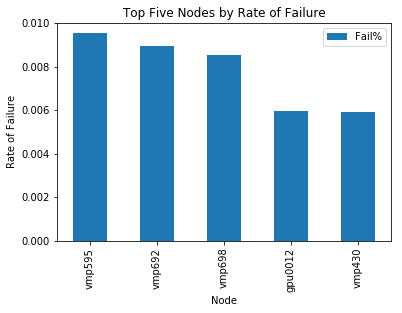

In [91]:
#barplot of top 5 
node_fails_table[["Fail%"]].iloc[0:5,:].plot(kind="bar")
plt.xlabel("Node")
plt.ylabel("Rate of Failure")
plt.title("Top Five Nodes by Rate of Failure")
